# **합성곱 신경망(CNN)**

##### **완전연결 계층(Affine 계층)으로 이뤄진 네트워크의 예**
<img src="../CNN/assets/img/Screenshot 2023-08-02 at 2.57.35 PM.png" style="width: 700px; height: ;">

![Screenshot 2023-08-02 at 2.57.35 PM.png](<attachment:Screenshot 2023-08-02 at 2.57.35 PM.png>)

<br>
<br>
<br>

##### **CNN으로 이루어진 네트워크의 예**
<img src="../CNN/assets/img/Screenshot 2023-08-02 at 2.57.48 PM.png" style="width: 700px; height: ;">

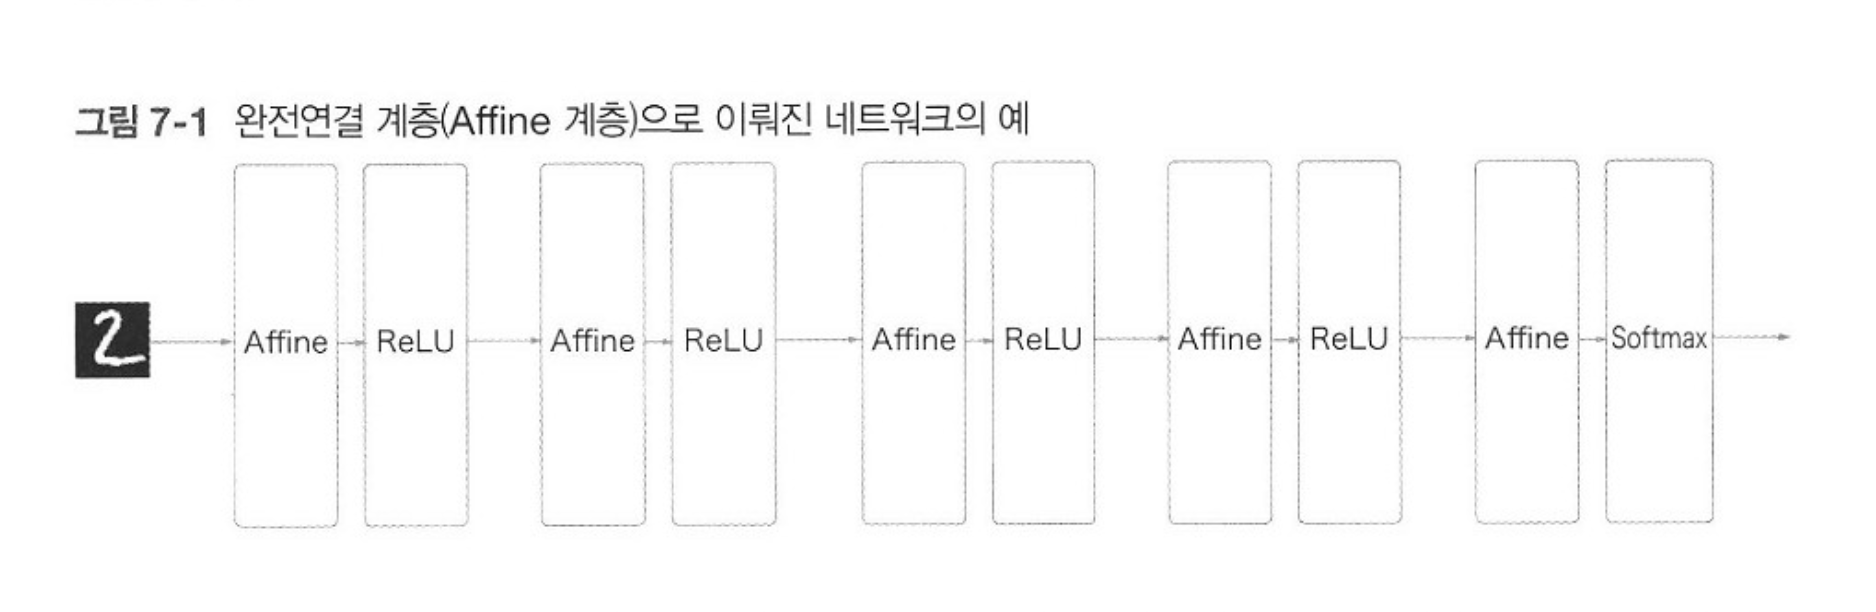

### **완전연결 계층의 문제점**
- 데이터 형상 무시 *(반면, 합성곱 계층은 데이터 형상을 유지)*
<br>
<br>
<br>
<br>
<br>

## **합성곱 연산**
<img src="../CNN/assets/img/Screenshot 2023-08-02 at 3.04.03 PM.png" style="width: 700px; height: ;">



## **패딩**
*"입력 데이터 주변을 0으로 채우는 기법"*


<img src="../CNN/assets/img/Screenshot 2023-08-02 at 3.10.06 PM.png" style="width: 700px; height: ;">

### **왜 패딩을 사용하는가**
*"입력 데이터의 공간적 크기를 고정한 채로 다음 계층에 전달할 수 있기 때문"*
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### **스트라이드**
##### **스트라이드** : 필터를 적용하는 위치의 간격


<img src="../CNN/assets/img/Screenshot 2023-08-02 at 3.15.16 PM.png" style="width: 700px; height: ;">
<br>
<br>
<br>


##### **패딩, 스트라이드, 출력 크기 계산 수식화**
<img src="../CNN/assets/img/Screenshot 2023-08-02 at 3.40.43 PM.png" style="width: 500px; height: ;">
<br>
<br>
<br>
<br>

## **3차원 데이터의 합성곱 연산**


<img src="../CNN/assets/img/Screenshot 2023-08-02 at 3.46.09 PM.png" style="width: 800px; height: ;">

##### **3차원 데이터 합성곱 연산의 계산 순서**
<img src="../CNN/assets/img/Screenshot 2023-08-02 at 3.47.50 PM.png" style="width: 800px; height: ;">

*"참고 | 3차원의 합성곱 연산에서 주의할 점은 입력 데이터의 채널 수와 필터의 채널 수가 같아야 한다는 것"*


## **블록으로 생각하기**

<img src="../CNN/assets/img/Screenshot 2023-08-02 at 3.55.12 PM.png" style="width: 800px; height: ;">

*"위 사진의 출력 데이터는 한 장의 채널이 1개인 특징 맵. 합성곱 연산의 출력으로 다수의 채널을 내보내려면?"*


<img src="../CNN/assets/img/Screenshot 2023-08-02 at 4.04.54 PM.png" style="width: 800px; height: ;">

*"FN개의 맵을 모으면 형상이(FN, OH, OW)인 블록이 안성되는데,이 완성된 블록을 다음 계층으로 넘기 겠다는 것이 CNN의 처리 흐름"*

<img src="../CNN/assets/img/Screenshot 2023-08-02 at 4.08.51 PM.png" style="width: 800px; height: ;">
<br>
<br>
<br>
<br>
<br>
<br>

## **배치처리**

<img src="../CNN/assets/img/Screenshot 2023-08-02 at 4.14.36 PM.png" style="width: 800px; height: ;">

*"신경망에 4차원 데이터가 하나 흐를 때마다 N개에 대한 합성곱 연산이 이루어짐, 즉 N회 분의 처리를 한번에 수행함"*
<br>
<br>
<br>
<br>
<br>

## **풀링계층**
<img src="../CNN/assets/img/Screenshot 2023-08-02 at 4.18.30 PM.png" style="width: 800px; height: ;">

- **최대 풀링(Max pooling)**: 대상 영역의 최댓값을 구하는 연산(이미지 인식분야에서 주로 사용됨)  

- **평균 풀링(Average pooling)**: 대상 영역의 평균을 구하는 연산
<br>
<br>
<br>
<br>
<br>

#### **풀링 계층의 특징**
- **학습해야할 매개변수가 없음:** 대상영역에서 최댓값이나 평균을 취하는 명확한 처리이므로 특별히 학습할 것이 없음

- **채널 수가 변하지 않는다:** 채널마다 독립적으로 계산하기 때문

<img src="../CNN/assets/img/Screenshot 2023-08-02 at 4.27.57 PM.png" style="width: 800px; height: ;">

- **입력 변화에 영향을 적게 받는다**:입력 데이터의 차이를 풀링이 흡수해 사라지게 함

<img src="../CNN/assets/img/Screenshot 2023-08-02 at 4.32.52 PM.png" style="width: 800px; height: ;">




## **합성곱/풀링 계층 구현**

In [3]:
import numpy as np

x = np.random.rand(10, 1, 28, 28) # 무작위로 데이터 선정
x.shape

(10, 1, 28, 28)

In [4]:
x[0].shape
x[1].shape

(1, 28, 28)

In [5]:
x[0,0]

array([[3.04238173e-01, 5.39727275e-01, 6.52911135e-01, 2.09197346e-01,
        4.90755208e-01, 7.23109833e-01, 5.42210992e-01, 2.72556428e-01,
        3.62843972e-01, 5.43916152e-01, 4.70000820e-01, 8.82474563e-01,
        2.37777860e-01, 6.66032198e-01, 9.64833377e-01, 3.52825780e-02,
        9.24244016e-02, 1.64215816e-01, 9.73288223e-01, 7.34954868e-01,
        8.07220470e-01, 4.64483804e-01, 1.77513911e-01, 5.52801596e-01,
        3.14613315e-01, 3.82586598e-01, 1.45027739e-01, 2.23885144e-01],
       [4.37141841e-01, 4.10544976e-01, 8.07613912e-02, 2.44583502e-01,
        6.25221715e-01, 4.34405158e-01, 8.49330151e-01, 5.30615724e-01,
        8.77783963e-01, 6.53572037e-02, 1.25382364e-01, 4.40642032e-01,
        5.14078120e-01, 4.36513167e-01, 2.93308968e-01, 5.95020339e-01,
        5.94063730e-01, 7.96498300e-01, 2.81526862e-01, 4.97879755e-01,
        4.22376634e-01, 7.92601904e-01, 8.59434945e-01, 7.40443199e-01,
        7.61082282e-01, 7.97505999e-01, 7.64116296e-01, 7.63362

### **im2col로 데이터 전개하기**
*"im2col: 입력 데이터를 필터링(가중치 계산)하기 좋게 전개하는 함수"* 
*"image to column(이미지에서 행렬로)라는 뜻"*

<img src="../CNN/assets/img/Screenshot 2023-08-02 at 4.41.16 PM.png" style="width: 500px; height: ;">

<img src="../CNN/assets/img/Screenshot 2023-08-02 at 4.41.32 PM.png" style="width: 500px; height: ;">

<img src="../CNN/assets/img/Screenshot 2023-08-02 at 4.43.09 PM.png" style="width: 500px; height: ;">

<br>
<br>
<br>
<br>
<br>
<br>


### **합성곱 계층 구현**





In [14]:
import sys, os
sys.path.append(os.pardir)
from util import im2col

x1 = np.random.rand(1, 3, 7, 7)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)

(9, 75)


In [16]:
x2 = np.random.rand(10, 3, 7, 7)
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)

(90, 75)


In [17]:
# im2col을 사용하여 합성곱 계층 구현

class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1 + (H + 2*self.pad - FH) / self.stride)
        out_w = int(1 + (W + 2*self.pad -FW) / self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T
        out = np.dot(col, col_W) + self.b

        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        return out

**FN:**  필터 개수,
**C:**  채널,
**FH:**  필터 높이,
**FW:**  필터 너비
<br>
<br>
<br>
<br>
<br>

## **풀링 계층 구현하기**

##### **풀링 계층 구현순서**
1. **입력 데이터 전개**  

2. **행별 최댓값 구함**  

3. **적절한 모양으로 성형**
<br>
<br>
<br>

### **forward 처리흐름**
<img src="../CNN/assets/img/Screenshot 2023-08-02 at 5.47.37 PM.png" style="width: 500px; height: ;">
<br>

<img src="../CNN/assets/img/Screenshot 2023-08-02 at 5.52.18 PM.png" style="width: 500px; height: ;">



In [20]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        #전개 (1)
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        # 최댓값 (2)
        out = np.max(col, axis=1)

        # 성형 (3)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        return out

<br>
<br>
<br>
<br>
<br>
<br>

## **CNN 구현하기**

<img src="../CNN/assets/img/Screenshot 2023-08-02 at 6.19.18 PM.png" style="width: 800px; height: ;">

##### **초기화 때 받는 인수**
- **input_dim** - 입력 데이터(채널 수, 높이, 너비)의 차원  

- **conv_param** - 합성곱 계층의 하이퍼파라미터(딕셔너리)  

- **hidden_size** - 은닉층(완전연결)의 뉴런 수

- **output_size** - 출력층(완전연결)의 뉴런 수

- **weight_init_std** - 초기화 때의 가중치 표준편차



In [26]:
from collections import OrderedDict

class SimpleConvNet:
    def __init__(self, input_dim=(1, 28, 28),
                conv_param={'filter_num':30, 'filter_size':5,
                            'pad':0, 'stride':1},
                hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad)
        pool_output_size = int(filter_num * (conv_output_size/2) *
                            (conv_output_size/2))
        
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0],
                                            filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size,
                                            hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'],
                                        self.params['b1'],
                                        conv_param['stride'],
                                        conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'],
                                        self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layer['Affine2'] = Affine(self.params['W3'],
                                    self.params['b3'])
        self.last_layer = SoftmaxWithLoss()

In [28]:
# 추론을 수행하는 predict메서드와 손실 함수의 값을 구하는 loss메서드

def predicd(self, x):
    for layer in self.layers.values():
        x = layer.forward(x)
    return x

def loss(self, x, t):
    y = self.predict(x)
    return self.last_layer.forward(y,t)

In [29]:
# 오차역전파법으로 기울기 구하는 구현
def gradient(self, x, t):
    # 순전파
    self.loss(x, t)

    # 역전파
    dout = 1
    dout = self.last_layers.backward(dout)

    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
        dout = layer.backward(dout)

    # 결과 저장
    grads = {}
    grads['W1'] = self.layers['Conv1'].dW
    grads['b1'] = self.layers['Conv1'].db
    grads['W2'] = self.layers['Affine1'].dW
    grads['b2'] = self.layers['Affine1'].db
    grads['W3'] = self.layers['Affine2'].dW
    grads['b3'] = self.layers['Affine2'].db

    return grads


## **CNN 시각화하기**

#### **1번째 층의 가중치 시각화하기**


<img src="../CNN/assets/img/Screenshot 2023-08-02 at 9.48.14 PM.png" style="width: 800px; height: ;">

*"학습 전 필터는 무작위로 초기화되고 있어 흑백의 정도에 규칙성이 없지만, 학습후에는 규칙성이 있는 이미지가 됨"*

> 학습 전 필터를 무작위로 초기화된 가중치는 아직 입력 이미지의 특징을 잘 감지하지 못할 수 있는데, 학습을 통해 이러한 가중치들이 점차 최적화되어 입력 이미지의 특징을 잘 감지할 수 있게 됩니다.

*"1번째 층의 합성곱 계층에서는 에지나 블롭 등의 저수준 정보가 추출"*

<br>
<br>
<br>
<br>

<img src="../CNN/assets/img/Screenshot 2023-08-02 at 9.50.42 PM.png" style="width: 800px; height: ;">

*"원시적인 정보가 뒷단 계층에 전달되는 것이 CNN에서 일어나는 일"*
<br>
<br>
<br>
<br>

### **층 깊이에 따른 추출 정보 변화**

<img src="../CNN/assets/img/Screenshot 2023-08-02 at 9.55.05 PM.png" style="width: 800px; height: ;">

*"계층이 깊어질수록 더 복잡하고 추상화된 정보가 추출됨, 즉, 층이 깊어지면서 뉴런이 반응하는 대상이 단순한 모양에서 '고급'정보로 변해가고, 사물의 '의미'를 이해하도록 변화"*

<br>
<br>
<br>
<br>
<br>
<br>

# **대표적인 CNN**
- **LeNet**

- **AlexNet**

<br>
<br>
<br>

### **LeNet**
- **딥러닝의 초기모델**

- **손글씨 숫자를 인식하는 네트워크**

<img src="../CNN/assets/img/Screenshot 2023-08-02 at 10.16.30 PM.png" style="width: 800px; height: ;">



<br>
<br>
<br>
<br>

### **AlexNet**
<img src="../CNN/assets/img/Screenshot 2023-08-02 at 10.19.30 PM.png" style="width: 800px; height: ;">

- **활성화 함수로 ReLU를 이용**

- **LRN이라는 국소적 정규화를 실시하는 계층을 이용**

- **드롭아웃을 사용**

*"합성곱 계층과 풀링 계층을 반복하고, 마지막으로 완전 연결 계층을 거치면서 결과를 출력"*

*"AlexNet은 더 많은 합성곱 계층과 완전 연결 계층을 포함하며, 더 많은 학습 가능한 파라미터를 가지고 있음"*

*"이러한 크기와 복잡성 측면에서 AlexNet은 더 많은 컴퓨팅 자원이 필요하고, GPU를 이용한 병렬 처리가 필요한 더 복잡한 모델"*


<br>
<br>
<br>
<br>
<br>
<br>
<br>

## **주요내용**
<img src="../CNN/assets/img/Screenshot 2023-08-02 at 10.23.47 PM.png" style="width: 800px; height: ;">


### <u> 1. *"CNN의 동작방식과 합성곱 계층과 풀링 계층 설명"*</u>

*"CNN은 이러한 합성곱 계층과 풀링 계층을 다층으로 쌓아서 복잡한 이미지의 특징을 추출하고, 이를 기반으로 분류, 객체 감지, 분할 등의 작업을 수행"*
<br>
<br>

**합성곱 계층(Convolutional Layer):**

- 합성곱 계층은 입력 이미지에 여러 개의 필터(커널)를 적용하여 특징 맵(Feature Map)을 생성하는 계층입니다.

- 합성곱 계층은 필터를 이미지 전체에 적용하여 공간적인 특징을 추출하는 특성을 가지며, 학습을 통해 필터의 가중치가 자동으로 학습됩니다.

- 필터는 작은 크기의 윈도우처럼 동작하며, 입력 이미지와 합성곱 연산을 수행하여 특정한 특징(선, 모서리, 색상 패턴 등의 시각적 특징)을 감지합니다.


**풀링 계층(Pooling Layer):**

- 풀링 계층은 합성곱 계층의 출력인 특징 맵을 다운샘플링하여 크기를 줄이고 중요한 정보를 보존하는 역할을 합니다.

- 주로 최대 풀링(Max Pooling)이 사용되며, 윈도우 내에서 최대값을 선택하여 특징 맵의 크기를 감소시킵니다.

- 풀링은 이미지의 이동, 크기 변화에 불변성을 제공하고, 계산량을 줄이면서 공간적인 정보를 보존합니다.

- 이를 통해 특징 맵의 크기를 줄이면서 중요한 정보를 유지하여 연산 효율성을 높이고, 과적합을 방지하는 효과를 가져옵니다.



<br>
<br>
<br>

### <u>2. *"im2col은 무엇이고, 합성곱 계층과 풀링 계층은 im2col을 이용하면 어떻게 간단하고 효율적으로 구현할 수 있는가"*</u>

*"im2col은 CNN에서 중요한 최적화 기법 중 하나로, 반복문을 통한 원소별 계산이 아닌 행렬 연산으로 한 번에 처리하여, 계산 속도가 대폭 향상되고, 이를 통해 합성곱과 풀링 계층의 구현을 간단하고 효율적으로 할 수 있습니다."*
<br>
<br>

**합성곱 계층 구현:**
일반적으로 합성곱 연산은 입력 이미지와 필터를 합성곱하여 특징 맵을 생성하는데, im2col을 사용하면 입력 이미지를 행렬로 전개하고 필터를 행렬로 변환하여 행렬 연산으로 처리할 수 있습니다.

1. 입력 이미지를 im2col로 전개하여 2차원 행렬로 변환합니다. 이때 필터 크기에 맞게 이미지를 격자 형태로 분할합니다.

2. 필터를 1차원으로 펼쳐서 2차원 행렬로 변환합니다.

3. 행렬 곱셈을 통해 합성곱 연산을 수행합니다.

4. 행렬 결과를 특징 맵 형태로 다시 변환합니다.


**풀링 계층 구현:**
풀링 계층은 주로 최대 풀링(Max Pooling)을 사용하고, 특정 영역에서 가장 큰 값을 선택하는 연산을 수행합니다.

1. 입력 이미지를 im2col로 전개하여 2차원 행렬로 변환합니다. 이때 풀링 영역에 맞게 이미지를 격자 형태로 분할합니다.

2. 각 격자 영역에서 최대값을 선택하여 1차원 벡터로 만듭니다.

3. 벡터를 특징 맵 형태로 다시 변환합니다.



<br>
<br>
<br>

### <u>3. *"LeNet, AlexNet이란"*</u>

**LeNet:**

- LeNet은 최초의 합성곱 신경망(CNN) 모델

- 손글씨 숫자(MNIST) 인식을 위해 개발됨

- LeNet은 입력 이미지에 순차적으로 합성곱, 풀링, 완전 연결 계층을 사용하여 이미지의 특징을 추출하고 분류하는 방식으로 구성



**AlexNet:**

- AlexNet은 LeNet과 비교해 깊고 큰 모델로, 8개의 계층으로 구성되어 있습니다.

- 합성곱 계층과 풀링 계층을 번갈아 가며 쌓아 구성하였고, ReLU 활성화 함수를 사용했습니다.

- GPU를 이용하여 병렬 연산을 하여 훈련 속도를 높이는 등의 기술적인 요소가 적용되었습니다.
